### PCA on Generated Gene Data

A PCA will be performed on the make up data (Dataset:10 samples*100 genes(features))

In [1]:
#import necessary modules 

import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

### Data Generation

In [2]:

# Dataframe: columns are samples and rows are genes
Genes = ['Genes' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=Genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
#print(data.head())
print(data.shape)
 
Main_data= data.T  #Transpose the dataframe
print(Main_data.head())

(100, 10)
    Genes1 Genes2 Genes3 Genes4 Genes5 Genes6 Genes7 Genes8 Genes9 Genes10  \
wt1    556    563    829    297    626    330    350    338    519     177   
wt2    601    591    828    291    655    368    378    338    514     192   
wt3    592    565    819    303    591    315    347    320    529     196   
wt4    589    617    839    260    634    324    361    295    496     177   
wt5    562    505    766    292    603    334    380    323    480     200   

     ... Genes91 Genes92 Genes93 Genes94 Genes95 Genes96 Genes97 Genes98  \
wt1  ...     258     370      38     663     494     962     493     241   
wt2  ...     298     366      50     612     510     928     590     248   
wt3  ...     279     410      57     650     474     961     593     220   
wt4  ...     265     418      55     688     473     939     559     264   
wt5  ...     261     386      63     718     493     894     568     232   

    Genes99 Genes100  
wt1     884      279  
wt2     922      3

#### Data scaling

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Main_data)
scaled_data_df = pd.DataFrame(scaled_data, index=[*wt, *ko], columns=Genes)
print(scaled_data_df)

       Genes1    Genes2    Genes3    Genes4    Genes5    Genes6    Genes7  \
wt1  0.912573  0.974973  1.051146 -0.951259 -0.947315 -1.024860  0.045396   
wt2  1.074568  1.081778  1.046799 -0.982329 -0.712911 -0.745487  1.634255   
wt3  1.042169  0.982602  1.007674 -0.920189 -1.230216 -1.135139 -0.124839   
wt4  1.031370  1.180953  1.094617 -1.142858 -0.882652 -1.068972  0.669590   
wt5  0.934172  0.753735  0.777274 -0.977151 -1.133222 -0.995453  1.747745   
ko1 -0.991771 -0.993282 -0.987677  1.011328  0.895585  0.967515 -1.316483   
ko2 -0.995371 -0.989468 -0.931164  1.208105  1.089574  1.151314 -0.465309   
ko3 -0.998971 -0.962767 -0.974636  0.990615  0.960248  0.930756 -0.522054   
ko4 -0.995371 -0.993282 -1.135481  0.840443  0.677347  0.960163 -1.146248   
ko5 -1.013370 -1.035241 -0.948553  0.923296  1.283564  0.960163 -0.522054   

       Genes8    Genes9   Genes10  ...   Genes91   Genes92   Genes93  \
wt1 -0.936505  1.068571 -1.053274  ...  0.888050 -1.188863 -1.932979   
wt2 -0.9

#### performing PCA

In [4]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
# Total number of PCA formed=minimum number between No. of samples and No. of attribute or features

np.shape((pca_data))

(10, 10)

#### Percentage of variation in the data that each PC can explain

[8.67352346e+01 3.14940121e+00 2.72735371e+00 2.20535561e+00
 1.78980900e+00 1.20249708e+00 1.06663767e+00 6.28974075e-01
 4.94736995e-01 1.69862197e-30]


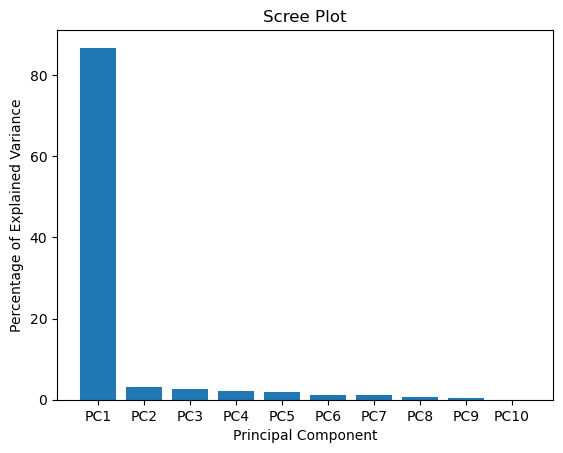

In [5]:
explained_variance_percentage = pca.explained_variance_ratio_*100  # get the explained variance for each PC
explained_variance_percentage.sum()
print(explained_variance_percentage)
# Draw a scree plot and a PCA plot

x = [f"PC{i}" for i in range(1,(len(explained_variance_percentage))+1)]

plt.bar(x, explained_variance_percentage)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### PCA plot

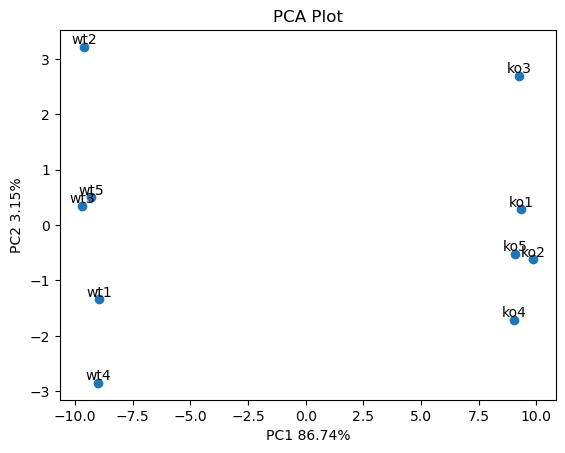

In [6]:
PCA_DATA_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=x)
PCA_DATA_df

plt.scatter(PCA_DATA_df.PC1, PCA_DATA_df.PC2)
#add name of samples to the datapoint on the graph
for i, index in enumerate(PCA_DATA_df.index):
    plt.text(PCA_DATA_df['PC1'][i], PCA_DATA_df['PC2'][i], str(index), ha='center', va='bottom')
# Add labels and title
plt.xlabel('PC1 '+ str('{:.2f}'.format(explained_variance_percentage[0])+'%'))
plt.ylabel('PC2 '+ str('{:.2f}'.format(explained_variance_percentage[1])+'%'))
plt.title('PCA Plot')

# Display the plot
plt.show()

In [18]:
PCA_DATA_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-8.956903,-1.341222,-2.833976,-1.779267,-0.800061,-1.297428,0.993793,0.524905,0.032477,-1.637579e-15
wt2,-9.602000,3.214290,0.600144,-0.702597,-1.937159,-0.192287,-1.457786,-0.337220,0.004515,-9.714451e-16
wt3,-9.685217,0.350928,-0.267831,1.608527,2.235458,0.077634,-0.959706,1.376966,-0.048849,8.638923e-16
wt4,-9.003425,-2.847987,1.917667,0.522451,0.547344,-0.849546,-0.308078,-1.295231,-0.494404,1.804112e-15
wt5,-9.294350,0.500860,0.695280,0.249371,-0.071260,2.190698,1.818629,-0.261979,0.504869,4.640385e-16
ko1,9.331191,0.283221,0.100883,0.842822,0.383333,-1.151212,-0.001814,-0.377812,1.756139,-9.020562e-16
ko2,9.863299,-0.618880,3.211402,-1.590637,-0.576116,-0.198628,0.356846,1.222228,-0.238995,1.790235e-15
ko3,9.250828,2.689172,-0.614382,0.847901,0.947529,-0.840997,1.227706,-0.491852,-1.081744,1.040834e-15
ko4,9.024353,-1.705216,-1.366895,2.399902,-2.175754,0.858893,-0.517083,0.216799,-0.356803,2.178813e-15
ko5,9.072225,-0.525166,-1.442292,-2.398474,1.446687,1.402873,-1.152507,-0.576804,-0.077204,-1.970646e-15


#### Loadings
Effect or weight of each variable in PCA
loadings represent the weights or coefficients indicating the contribution of each feature (variable) to a specific principal component. Loadings provide insight into the relationship between the original features and the principal components.

Large loadings (either positive or negative) indicate strong associations between the feature and the principal component,

The sign (positive or negative) of the loading indicates the direction of the relationship between the feature and the principal component.
loadings close to zero suggest that the feature has little influence on that component.

In [26]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings, index=x, columns=Genes)
loadings_df
#a=scaled_data_df.iloc[0].tolist()
dot_product = np.dot(scaled_data,loadings.T)
np.shape(dot_product)
#dot product values is the same as PCA_DATA_df
loadings_df

,Genes1,Genes2,Genes3,Genes4,Genes5,Genes6,Genes7,Genes8,Genes9,Genes10,...,Genes91,Genes92,Genes93,Genes94,Genes95,Genes96,Genes97,Genes98,Genes99,Genes100
PC1,-0.107273,-0.106721,-0.106732,0.106893,0.105458,0.106736,-0.085255,0.106856,-0.106915,0.107029,...,-0.107128,0.002260,0.087419,0.097010,0.106961,-0.107227,-0.067040,0.106799,-0.107247,-0.107006
PC2,0.000144,-0.015624,-0.009832,0.026848,0.026228,0.033300,0.154209,0.022414,-0.004110,0.022909,...,0.017309,-0.386311,0.075418,-0.130412,0.023981,-0.015183,0.119108,0.009808,-0.005031,0.016900
PC3,0.020027,0.021130,0.016424,0.013728,0.012029,0.019976,0.161262,-0.020939,-0.027443,0.012906,...,0.015582,0.153992,0.245884,0.140495,0.020706,-0.007950,0.240238,-0.013498,0.019053,0.018175
PC4,0.000524,-0.004067,-0.038398,-0.016553,-0.097639,-0.023156,-0.133990,-0.041212,0.005472,-0.019895,...,-0.001326,0.337419,0.207636,-0.065097,-0.021882,-0.007548,0.211478,-0.005520,0.018171,-0.021809
PC5,-0.002106,-0.008150,0.014537,0.010530,-0.000274,-0.050182,-0.124694,0.020865,-0.008150,0.030317,...,-0.018655,0.189385,0.077764,0.012854,-0.008876,0.002388,0.031713,0.002087,0.010258,-0.001635
PC6,-0.019658,-0.075218,-0.073040,-0.003184,-0.011193,0.013199,0.266715,0.026942,-0.025570,0.025431,...,-0.013079,0.187455,0.083973,0.139105,-0.014364,-0.028562,0.302141,0.018289,-0.004552,-0.030044
PC7,-0.016483,-0.034754,-0.020515,0.008585,-0.072562,-0.035126,0.107303,-0.032353,-0.027835,-0.015165,...,-0.043785,-0.281011,0.162311,0.169799,-0.003313,-0.001625,-0.419518,-0.015470,-0.000047,-0.037921
PC8,-0.001704,-0.032727,-0.003137,0.088720,-0.092716,0.005392,-0.283996,0.001759,0.053026,0.016074,...,0.009138,0.058483,0.042921,0.117959,0.022962,0.020521,0.084795,-0.054799,0.018641,-0.045647
PC9,-0.008990,-0.049895,-0.027973,0.025443,-0.035732,0.009117,-0.125403,0.026576,-0.076150,0.035603,...,0.010866,-0.205851,0.147157,0.089044,0.076933,-0.030844,0.106758,-0.121273,0.017521,0.012293
PC10,-0.892560,0.122108,0.057135,0.190471,0.035068,-0.001400,0.004189,-0.048136,-0.012599,-0.015001,...,-0.032474,0.022291,0.028869,-0.050708,-0.016954,0.009042,0.094621,-0.036783,0.092776,0.047384


#### Plot of Loadings

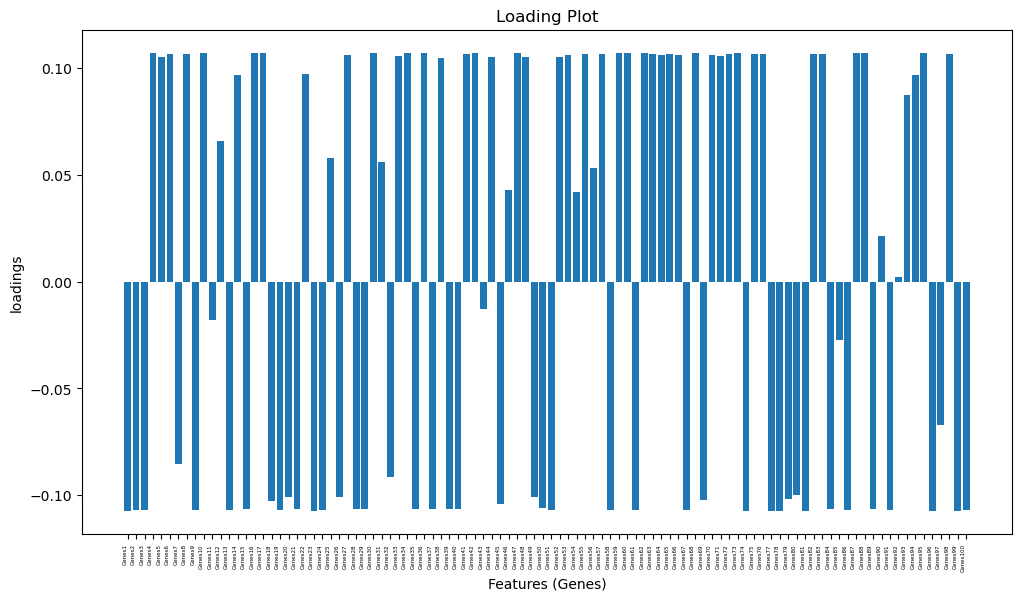

In [27]:

# Get the loadings from the PCA object

X=Genes
Y=loadings_df.loc['PC1'].tolist()
plt.figure(figsize=(12, 8))
plt.xlabel('Features (Genes)')
plt.ylabel('loadings')
plt.title('Loading Plot')
plt.bar(X,Y)

# Adjust the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.xticks(fontsize=4)
# Increase the spacing between the x-axis labels
plt.subplots_adjust(bottom=.25)

#### Top 15 most effective genes on PC1

In [46]:

new_df = pd.DataFrame([loadings_df.loc['PC1']])
#df_loading_PC1=pd.DataFrame(a,index=x_genes,columns='loading')
new_row=new_df.abs()
concatenated_df = pd.concat([new_df, new_row], ignore_index=True)
concatenated_df

,Genes1,Genes2,Genes3,Genes4,Genes5,Genes6,Genes7,Genes8,Genes9,Genes10,...,Genes91,Genes92,Genes93,Genes94,Genes95,Genes96,Genes97,Genes98,Genes99,Genes100
0,-0.107273,-0.106721,-0.106732,0.106893,0.105458,0.106736,-0.085255,0.106856,-0.106915,0.107029,...,-0.107128,0.00226,0.087419,0.09701,0.106961,-0.107227,-0.06704,0.106799,-0.107247,-0.107006
1,0.107273,0.106721,0.106732,0.106893,0.105458,0.106736,0.085255,0.106856,0.106915,0.107029,...,0.107128,0.00226,0.087419,0.09701,0.106961,0.107227,0.06704,0.106799,0.107247,0.107006


In [48]:
#sorting rows from largest to lowest loadings based on the abs values
sorted_df = concatenated_df
# Sort the DataFrame based on values in row 2 and store the sorted indices
sorted_indices = sorted_df.loc[1].sort_values(ascending=False).index
sorted_df = sorted_df[sorted_indices]

sorted_df

,Genes59,Genes74,Genes23,Genes1,Genes36,Genes81,Genes99,Genes96,Genes88,Genes73,...,Genes25,Genes31,Genes56,Genes46,Genes54,Genes85,Genes90,Genes11,Genes43,Genes92
0,0.107295,-0.10729,-0.107286,-0.107273,0.107258,-0.107256,-0.107247,-0.107227,0.107222,0.107219,...,0.057987,0.055888,0.053278,0.043108,0.041978,-0.027253,0.021219,-0.017923,-0.012559,0.00226
1,0.107295,0.10729,0.107286,0.107273,0.107258,0.107256,0.107247,0.107227,0.107222,0.107219,...,0.057987,0.055888,0.053278,0.043108,0.041978,0.027253,0.021219,0.017923,0.012559,0.00226


In [49]:
top_15=sorted_df.iloc[0][0:14]
top_15

Genes59    0.107295
Genes74   -0.107290
Genes23   -0.107286
Genes1    -0.107273
Genes36    0.107258
Genes81   -0.107256
Genes99   -0.107247
Genes96   -0.107227
Genes88    0.107222
Genes73    0.107219
Genes77   -0.107210
Genes34    0.107208
Genes78   -0.107180
Genes62    0.107180
Name: 0, dtype: float64

In [51]:
top_15.index.to_list()

['Genes59',
 'Genes74',
 'Genes23',
 'Genes1',
 'Genes36',
 'Genes81',
 'Genes99',
 'Genes96',
 'Genes88',
 'Genes73',
 'Genes77',
 'Genes34',
 'Genes78',
 'Genes62']

#### plot top-15 loadings

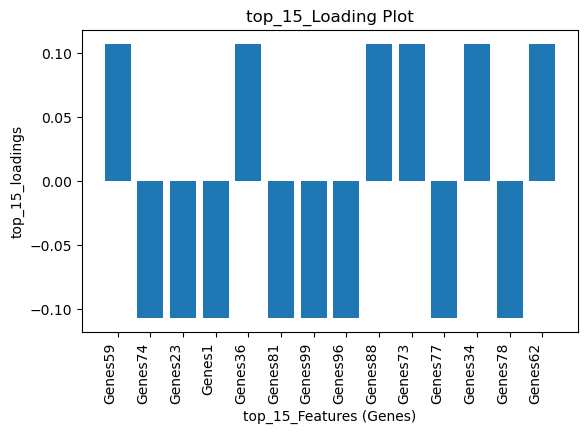

In [52]:
# Get the loadings from the PCA object

X_genes_top = top_15.index.to_list()

Y_top=top_15.to_list()
plt.xlabel('top_15_Features (Genes)')
plt.ylabel('top_15_loadings')
plt.title('top_15_Loading Plot')
plt.bar(X_genes_top,Y_top)
# Adjust the x-axis labels
plt.xticks(rotation=90, ha='right')

# Increase the spacing between the x-axis labels
plt.subplots_adjust(bottom=0.25)

# Show the plot
plt.show()